### get user game playtime data : json to csv 

In [24]:
import json
import csv

file_path = "./DM23-steamCrawling/data/UsersGamesData.json"

with open(file_path, 'r') as file:
  # JSON 데이터를 파이썬 딕셔너리로 변환
  data = json.load(file)
  print(type(data))
  # print(data["76561199029457670"])

# 결과를 저장할 리스트
result = []

# JSON 데이터를 순회하면서 user_id, appid, playtime_forever 추출
for user_id, games in data.items():
    for game in games:
        playtime_hours = game['playtime_forever'] / 60
        # 나눗셈 결과가 0이면 정수 0으로, 그렇지 않으면 소수점 첫째 자리까지 반올림
        playtime_hours = 0 if playtime_hours == 0 else round(playtime_hours, 1)
        result.append((user_id, game['appid'], playtime_hours))

# 결과 출력
# for record in result:
#     print(f'{record[0]}, {record[1]}, {record[2]}')
# print(result)

filename = "./DM23-steamCrawling/data/user_game_playtime1.csv"

# CSV 파일로 저장
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)

    # 헤더 작성
    writer.writerow(['user_id', 'appid', 'playtime_forever'])

    # 데이터 작성
    writer.writerows(result)

print(f"Data has been written to {filename}")


<class 'dict'>
Data has been written to ./DM23-steamCrawling/data/user_game_playtime1.csv


### Dataset

count    1.017452e+06
mean     2.889165e+01
std      2.472608e+02
min      0.000000e+00
25%      1.100000e+00
50%      3.300000e+00
75%      7.100000e+00
max      5.722590e+04
Name: playtime_forever, dtype: float64


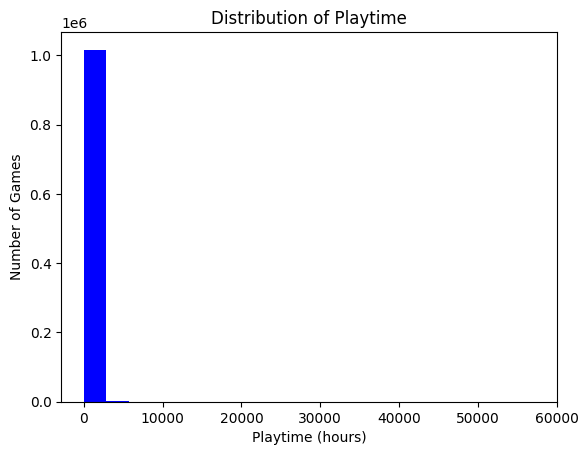

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩
filename = "./DM23-steamCrawling/data/user_game_playtime1.csv"
df = pd.read_csv(filename)

# 기본 통계 정보 출력
print(df['playtime_forever'].describe())

# 플레이 시간 분포 그래프
plt.hist(df['playtime_forever'], bins=20, color='blue')
plt.title('Distribution of Playtime')
plt.xlabel('Playtime (hours)')
plt.ylabel('Number of Games')
plt.show()


### Preprocessing user game playtime data

In [2]:
import pandas as pd

# 데이터 로딩
df = pd.read_csv("./DM23-steamCrawling/data/user_game_playtime1.csv")
print("전체 개수", len(df))
# 0시간 플레이 행의 개수 계산
zero_playtime_count = len(df[df['playtime_forever'] == 0])
print("0의 개수",zero_playtime_count)
# 1시간 미만 플레이 행의 개수 계산
less_hour_playtime_count = len(df[df['playtime_forever'] < 1])
print("1시간 미만 개수",less_hour_playtime_count)
# 0시간 플레이 제거
df_filtered = df[df['playtime_forever'] >= 1]

# 상위 95% 백분위수 이상의 값을 가진 행의 개수 계산
upper_limit = df_filtered['playtime_forever'].quantile(0.95)
outlier_count = len(df_filtered[df_filtered['playtime_forever'] >= upper_limit])
print("결측치 제거",outlier_count)
# 상위 95% 백분위수 이상의 값을 가진 데이터 제거
df_filtered_outlier = df_filtered[df_filtered['playtime_forever'] < upper_limit]
print("정제된 데이터",df_filtered_outlier)

# 결과 저장
df_filtered_outlier.to_csv('./DM23-steamCrawling/data/filtered_playtime_data.csv', index=False)


전체 개수 1017452
0의 개수 93221
1시간 미만 개수 238115
결측치 제거 38986
정제된 데이터                    user_id    appid  playtime_forever
2        76561199029457670      240              12.3
4        76561199029457670    17390               2.5
5        76561199029457670      550               5.9
10       76561199029457670   230410               4.1
12       76561199029457670   252950               5.3
...                    ...      ...               ...
1017443  76561198328000212  1782210               1.6
1017444  76561198328000212  1818750              35.3
1017445  76561198328000212  1677740              21.8
1017448  76561198328000212  2313250               1.1
1017449  76561198328000212  2357570               5.5

[740351 rows x 3 columns]


count    740351.000000
mean          9.432179
std          14.486136
min           1.000000
25%           2.500000
50%           4.200000
75%           8.500000
max          97.200000
Name: playtime_forever, dtype: float64


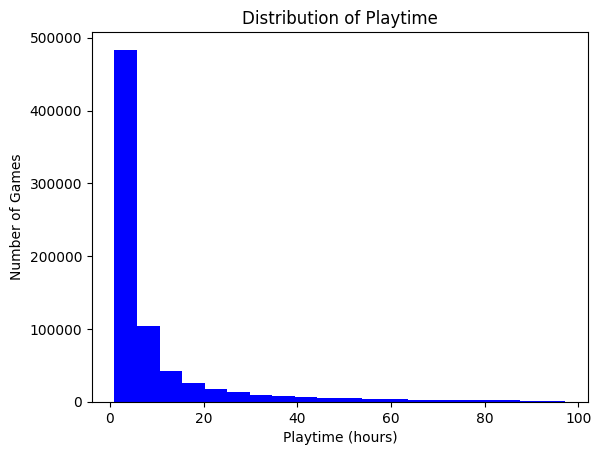

In [3]:
# 데이터 로딩
filename = "./DM23-steamCrawling/data/filtered_playtime_data.csv"
df = pd.read_csv(filename)

# 기본 통계 정보 출력
print(df['playtime_forever'].describe())

# 플레이 시간 분포 그래프
plt.hist(df['playtime_forever'], bins=20, color='blue')
plt.title('Distribution of Playtime')
plt.xlabel('Playtime (hours)')
plt.ylabel('Number of Games')
plt.show()

### get game list that user has

In [37]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("./DM23-steamCrawling/data/user_game_playtime1.csv")
print(len(df))
# 'appid' 컬럼에서 유니크한 값들만 추출
unique_appids = df['appid'].unique()

# 결과 출력
print(len(unique_appids))
print(unique_appids)

# 유니크한 appid를 데이터프레임으로 변환
unique_appids_df = pd.DataFrame(unique_appids, columns=['appid'])

# 새로운 CSV 파일로 저장
unique_appids_df.to_csv('./DM23-steamCrawling/data/unique_appids.csv', index=False)


1017452
28174
[     10      70     240 ... 1065100  244830  598180]


### utility matrix

In [3]:
import pandas as pd

# 첫 번째 데이터 파일 로딩
user_game_playtime_df = pd.read_csv("./DM23-steamCrawling/data/user_game_playtime1.csv")

# 데이터 집계: 각 사용자별로 각 게임의 플레이타임 합계 계산
aggregated_data = user_game_playtime_df.groupby(['user_id', 'appid'])['playtime_forever'].sum().reset_index()


# 두 번째 데이터 파일 로딩
pure_game_feature_df = pd.read_csv("./DM23-steamCrawling/data/pure_game_feature_matrix.csv")

# 유틸리티 매트릭스 생성
# 여기서는 'user_game_playtime_df' 데이터를 사용하여 예시를 보여줍니다.
# 'appid' (또는 'GameID')를 열로, 'user_id'를 행으로, 플레이타임을 값으로 하는 피벗 테이블 생성
utility_matrix = aggregated_data.pivot(index='user_id', columns='appid', values='playtime_forever')
utility_matrix.fillna(0, inplace=True)  # 결측값을 0으로 대체

# print(utility_matrix.head())  # 생성된 유틸리티 매트릭스의 첫 몇 행을 출력
# 시각적으로 테이블 형태로 출력
display(utility_matrix)

# 플레이 시간이 0보다 크면 1로, 그렇지 않으면 0으로 변환
binary_utility_matrix = utility_matrix.applymap(lambda x: 1 if x > 0 else 0)

# 시각적으로 테이블 형태로 출력
# display(binary_utility_matrix)

appid,10,20,30,40,50,60,70,80,92,100,...,2625430,2633760,2633890,2635340,2640560,2656900,2667410,2668050,2668170,2668350
user_id,,,,,,,,,,,,,,,,,,,,,
76561197960272730,521.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960273540,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960287391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960290192,215.7,0.0,0.5,0.0,0.0,0.0,0.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561197960302491,1310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76561199448310425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561199468140775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76561199490277372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/var/folders/mx/qwmmng8d3nd9gzy_zv70j88m0000gn/T/ipykernel_2225/3218719075.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_utility_matrix = utility_matrix.applymap(lambda x: 1 if x > 0 else 0)


In [14]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import pandas as pd
from steam import Steam
from decouple import config

KEY = config("STEAM_API_KEY")
steam = Steam(KEY)

def get_game_details(app_id):
    # try:
        data = steam.apps.get_app_details(app_id)
        app_detail = data[str(app_id)]['data']
        title = app_detail['name']
        print(title)
        # data2 = steam.apps.get_app_details(app_id, filters='genres')
        # app_detail2 = data2[str(app_id)]['data']['genres']
        # genres = [genre['description'] for genre in app_detail2]
        # print (title, genres)
        genres = []
        # return title, genres

    # except Exception as e:
    #     print(f"Error fetching appid {app_id}: {e}")
    #     return None



# 데이터 로딩 및 유틸리티 매트릭스 생성
# user_game_playtime_df 등은 이미 로드된 데이터를 가정합니다.
# utility_matrix = user_game_playtime_df.pivot(index='user_id', columns='appid', values='playtime_forever').fillna(0)

# 희소 행렬 변환
sparse_matrix = csr_matrix(utility_matrix.values)

# 코사인 유사도 계산
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(sparse_matrix)

# 사용자가 선호하는 특정 게임의 인덱스를 찾음 (예: 'appid_10' 게임)
query_index = utility_matrix.columns.tolist().index(30)

# 유사한 게임 추천
distances, indices = model_knn.kneighbors(utility_matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

# 결과 출력
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'Recommendation criteria game: {utility_matrix.columns[query_index]} ')
        get_game_details(utility_matrix.columns[query_index])
        # print(f'{title}, genres: {genres}')
    else:
        print(f'{i}: {utility_matrix.columns[indices.flatten()[i]]}, distance: {distances.flatten()[i]}')
        # get_game_details(utility_matrix.columns[indices.flatten()[i]])
        # print(f'{title}, genres: {genres}')

# print("Day of Defeat", "genres: Action")

# None
# print("Bloody Good Time", "genres: Action")
# print("The Witch's Yarn", "genres: Adventure, Casual, Indie")
# print("Runaway: A Twist of Fate", "genres: Adventure")
# print("Cherry Tree High Comedy Club", "genres: Action, Indie")



Recommendation criteria game: 30 
Day of Defeat
1: 201330, distance: 0.4472663214425585
2: 2450, distance: 0.4877957670914522
3: 287740, distance: 0.49013143666284653
4: 58560, distance: 0.5016781410695867
5: 214610, distance: 0.5029951174700893
